<a href="https://www.kaggle.com/code/gargivipat/linear-regression-dl?scriptVersionId=167312282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [3]:
# df['Unnamed: 0']

In [4]:
df.rename(columns = {'Unnamed: 0' : 's.no'},inplace=True)

In [5]:
df.columns

Index(['s.no', 'YearsExperience', 'Salary'], dtype='object')

In [6]:
df.set_index('s.no',inplace=True)

In [7]:
df.head()

,YearsExperience,Salary
s.no,,
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [9]:
df.shape

(30, 2)

# Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='s.no', ylabel='YearsExperience'>

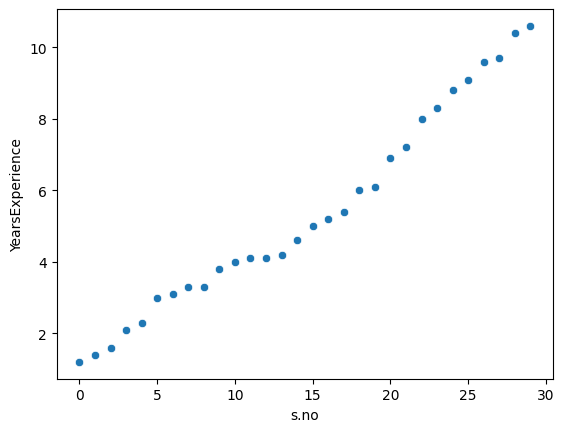

In [11]:
sns.scatterplot(df['YearsExperience'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Count'>

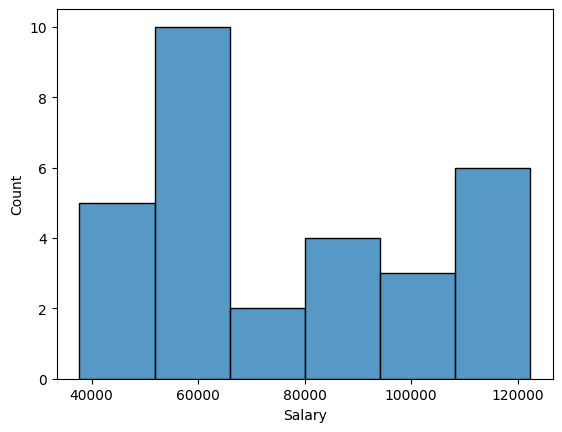

In [12]:
sns.histplot(df['Salary'])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

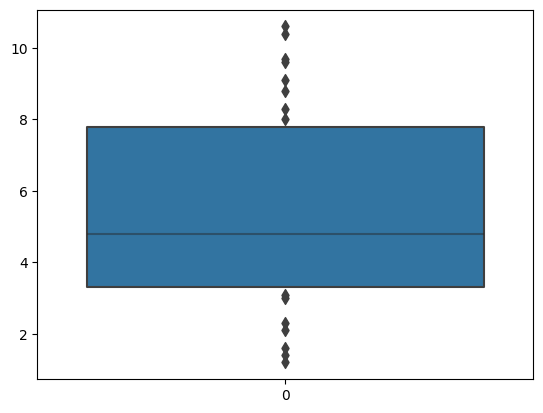

In [13]:
sns.boxenplot(df['YearsExperience'])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

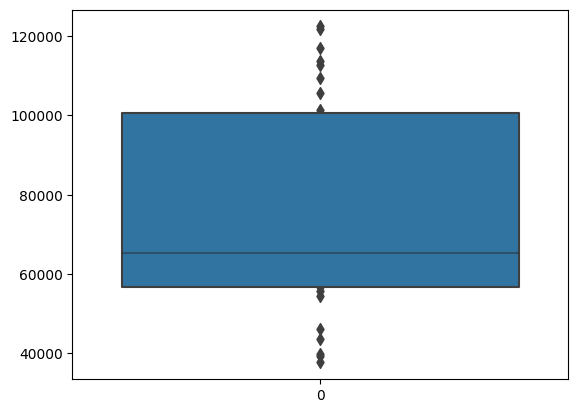

In [14]:
sns.boxenplot(df['Salary'])

# Model Training

In [15]:
x_train = np.array(df.loc[:,'YearsExperience'])[:25]

In [16]:
x_train.shape

(25,)

In [17]:
x_train

array([1.2, 1.4, 1.6, 2.1, 2.3, 3. , 3.1, 3.3, 3.3, 3.8, 4. , 4.1, 4.1,
       4.2, 4.6, 5. , 5.2, 5.4, 6. , 6.1, 6.9, 7.2, 8. , 8.3, 8.8])

In [18]:
y_train = np.array(df.loc[:,'Salary'])[:25]

In [19]:
y_train.shape

(25,)

In [20]:
y_train

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432.])

In [21]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [22]:
print(x_train.shape,y_train.shape)

(25, 1) (25, 1)


In [23]:
x_test = np.array(df.loc[:,'YearsExperience'])[25:]
y_test = np.array(df.loc[:,'Salary'])[25:]

In [24]:
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [25]:
print(x_test.shape,y_test.shape)

(5, 1) (5, 1)


In [26]:
from sklearn.model_selection import train_test_split

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg_model = LinearRegression()

In [29]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = reg_model.predict(x_test)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.043025351725355376

## Neural Network

In [32]:
import tensorflow as tf

2024-03-16 13:55:59.546174: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 13:55:59.546320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 13:55:59.717366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
def create_model():
    model = Sequential()
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])
    return model

In [35]:
model = create_model()

In [36]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 5109797376.0000
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 5109787648.0000
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 5109777920.0000
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 5109767680.0000
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 5109758464.0000
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 5109750784.0000
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 5109743104.0000
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 5109735936.0000
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 5109728768.0000
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 5109723648.0000
Epoch 11/200
1/1 ━━━━━━━━━━━━━━

In [37]:
pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [38]:
r2_score(y_test,pred)

-340.34574212155843